## Self-Organising Maps on images scraped from Google and Instagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display
import math
import shutil

2023-05-10 22:42:11.905013: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

In [4]:
pictures = os.listdir('/Users/mansikothari/Documents/UD_MARCH/RC_11/Term_02/Research/Images/images')
for i in pictures[0:3000]:
    shutil.copy('/Users/mansikothari/Documents/UD_MARCH/RC_11/Term_02/Research/Images/images/'+i, 'Istanbulimages')

In [5]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [6]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [7]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [8]:
pictures = os.listdir('images')
pictures.remove('.DS_Store')

In [9]:
pictures

['image207 copy 2.jpeg',
 'image204 copy.jpeg',
 'image95 copy.jpeg',
 'image398 copy 2.jpeg',
 'image63.jpeg',
 'streetlifeinistanbul273.jpeg',
 'slumstreetinistanbul64.jpeg',
 'image174 copy.jpeg',
 'istanbulstreetview25.jpeg',
 'istanbulstreetview112.jpeg',
 'image125.jpeg',
 'abandonedstreetinistanbul52.jpeg',
 'slumstreetinistanbul214.jpeg',
 'richstreetinistanbul136.jpeg',
 'image365 copy 2.jpeg',
 'abandonedstreetinistanbul162.jpeg',
 'streetlifeinistanbul224.jpeg',
 'streetlifeinistanbul8.jpeg',
 'image34.jpeg',
 'image277 copy 2.jpeg',
 'istanbulstreetview283.jpeg',
 'richstreetinistanbul83.jpeg',
 'richstreetinistanbul248.jpeg',
 'streetelementinistanbul48.jpeg',
 'istanbulstreetview72.jpeg',
 'image26 copy.jpeg',
 'slumstreetinistanbul33.jpeg',
 'streetlifeinistanbul58.jpeg',
 'image172.jpeg',
 'accientstreetinistanbul132.jpeg',
 'istanbulstreetview145.jpeg',
 'image315 copy 2.jpeg',
 'abandonedstreetinistanbul135.jpeg',
 'image90 copy 2.jpeg',
 'richstreetinistanbul161.jpeg

In [10]:
pictures.sort(key = lambda x:(x.split('.')[0]))

In [11]:
pictures

['abandonedstreetinistanbul0.jpeg',
 'abandonedstreetinistanbul1.jpeg',
 'abandonedstreetinistanbul10.jpeg',
 'abandonedstreetinistanbul100.jpeg',
 'abandonedstreetinistanbul101.jpeg',
 'abandonedstreetinistanbul102.jpeg',
 'abandonedstreetinistanbul103.jpeg',
 'abandonedstreetinistanbul104.jpeg',
 'abandonedstreetinistanbul105.jpeg',
 'abandonedstreetinistanbul106.jpeg',
 'abandonedstreetinistanbul107.jpeg',
 'abandonedstreetinistanbul108.jpeg',
 'abandonedstreetinistanbul109.jpeg',
 'abandonedstreetinistanbul11.jpeg',
 'abandonedstreetinistanbul110.jpeg',
 'abandonedstreetinistanbul111.jpeg',
 'abandonedstreetinistanbul112.jpeg',
 'abandonedstreetinistanbul113.jpeg',
 'abandonedstreetinistanbul114.jpeg',
 'abandonedstreetinistanbul115.jpeg',
 'abandonedstreetinistanbul116.jpeg',
 'abandonedstreetinistanbul117.jpeg',
 'abandonedstreetinistanbul118.jpeg',
 'abandonedstreetinistanbul119.jpeg',
 'abandonedstreetinistanbul12.jpeg',
 'abandonedstreetinistanbul120.jpeg',
 'abandonedstreetin

In [12]:
features = []
for m in pictures:
    path = os.path.join('images', m)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step


In [13]:
featureImagePairs = []
for i in range(len(features)):
    featureImage = {}
    featureImage['image'] = pictures[i]
    featureImage['feature'] = features[i]
    featureImagePairs.append(featureImage)

In [14]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 10000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = features
# Initialize the SOM randomly
SOM = rand.uniform(0, 6, (m, n, 1024)).astype(float)
# Display both the training matrix and the SOM grid
"""fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')"""

"fig, ax = plt.subplots(\n    nrows=1, ncols=2, figsize=(12, 3.5), \n    subplot_kw=dict(xticks=[], yticks=[]))\nax[0].imshow(train_data.reshape(50, 60, 3))\nax[0].title.set_text('Training Data')\nax[1].imshow(SOM.astype(int))\nax[1].title.set_text('Randomly Initialized SOM Grid')"

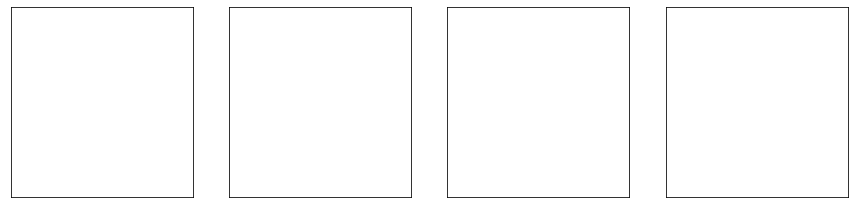

In [15]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 10
for epochs, i in zip([1, 4, 5, 10], range(0,9)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, learn_rate = .05, radius_sq = 0.5, 
             lr_decay = .05, radius_decay = .05, epochs = 50)

In [16]:
find_BMU(SOM, featureImagePairs[0]['feature'])

(2, 6)

In [17]:
SOMimages = []
for i in range(10):
    row = []
    for j in range(10):
        row.append([])
    SOMimages.append(row)

In [18]:
for fi in featureImagePairs:
    g,h = find_BMU(SOM,fi['feature'])
    SOMimages[g][h].append(fi)

In [19]:
SOMimages

[[[{'image': 'abandonedstreetinistanbul186.jpeg',
    'feature': array([0.23313484, 1.2849572 , 0.09456206, ..., 2.3026419 , 0.        ,
           0.00588661], dtype=float32)},
   {'image': 'abandonedstreetinistanbul249.jpeg',
    'feature': array([2.2560413 , 0.39069375, 0.0552685 , ..., 0.8965294 , 0.01086682,
           0.03308556], dtype=float32)},
   {'image': 'accientstreetinistanbul210.jpeg',
    'feature': array([1.1229898 , 0.3361167 , 0.8107609 , ..., 1.660026  , 0.        ,
           0.30537227], dtype=float32)},
   {'image': 'image116.jpeg',
    'feature': array([0.        , 0.50652194, 0.20925362, ..., 0.3751703 , 0.03867855,
           0.51469666], dtype=float32)},
   {'image': 'image125 copy.jpeg',
    'feature': array([1.9140508 , 1.4784672 , 0.47742173, ..., 0.8276435 , 0.7245644 ,
           1.2658037 ], dtype=float32)},
   {'image': 'image130 copy.jpeg',
    'feature': array([0.2141201 , 0.84948856, 0.6346097 , ..., 0.        , 0.        ,
           0.36251828], d

In [20]:
from scipy import spatial

imageGrid = []
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            tree = spatial.KDTree([d['feature'] for d in cell])
            bmd = tree.query(SOM[g][h])
            imageGrid.append(cell[bmd[1]]['image'])
        else:
            imageGrid.append('white.png')

In [21]:
def img_reshape(img):
    img = Image.open('images/'+img).convert('RGB')
    img = img.resize((100,100))
    img = np.asarray(img)
    return img

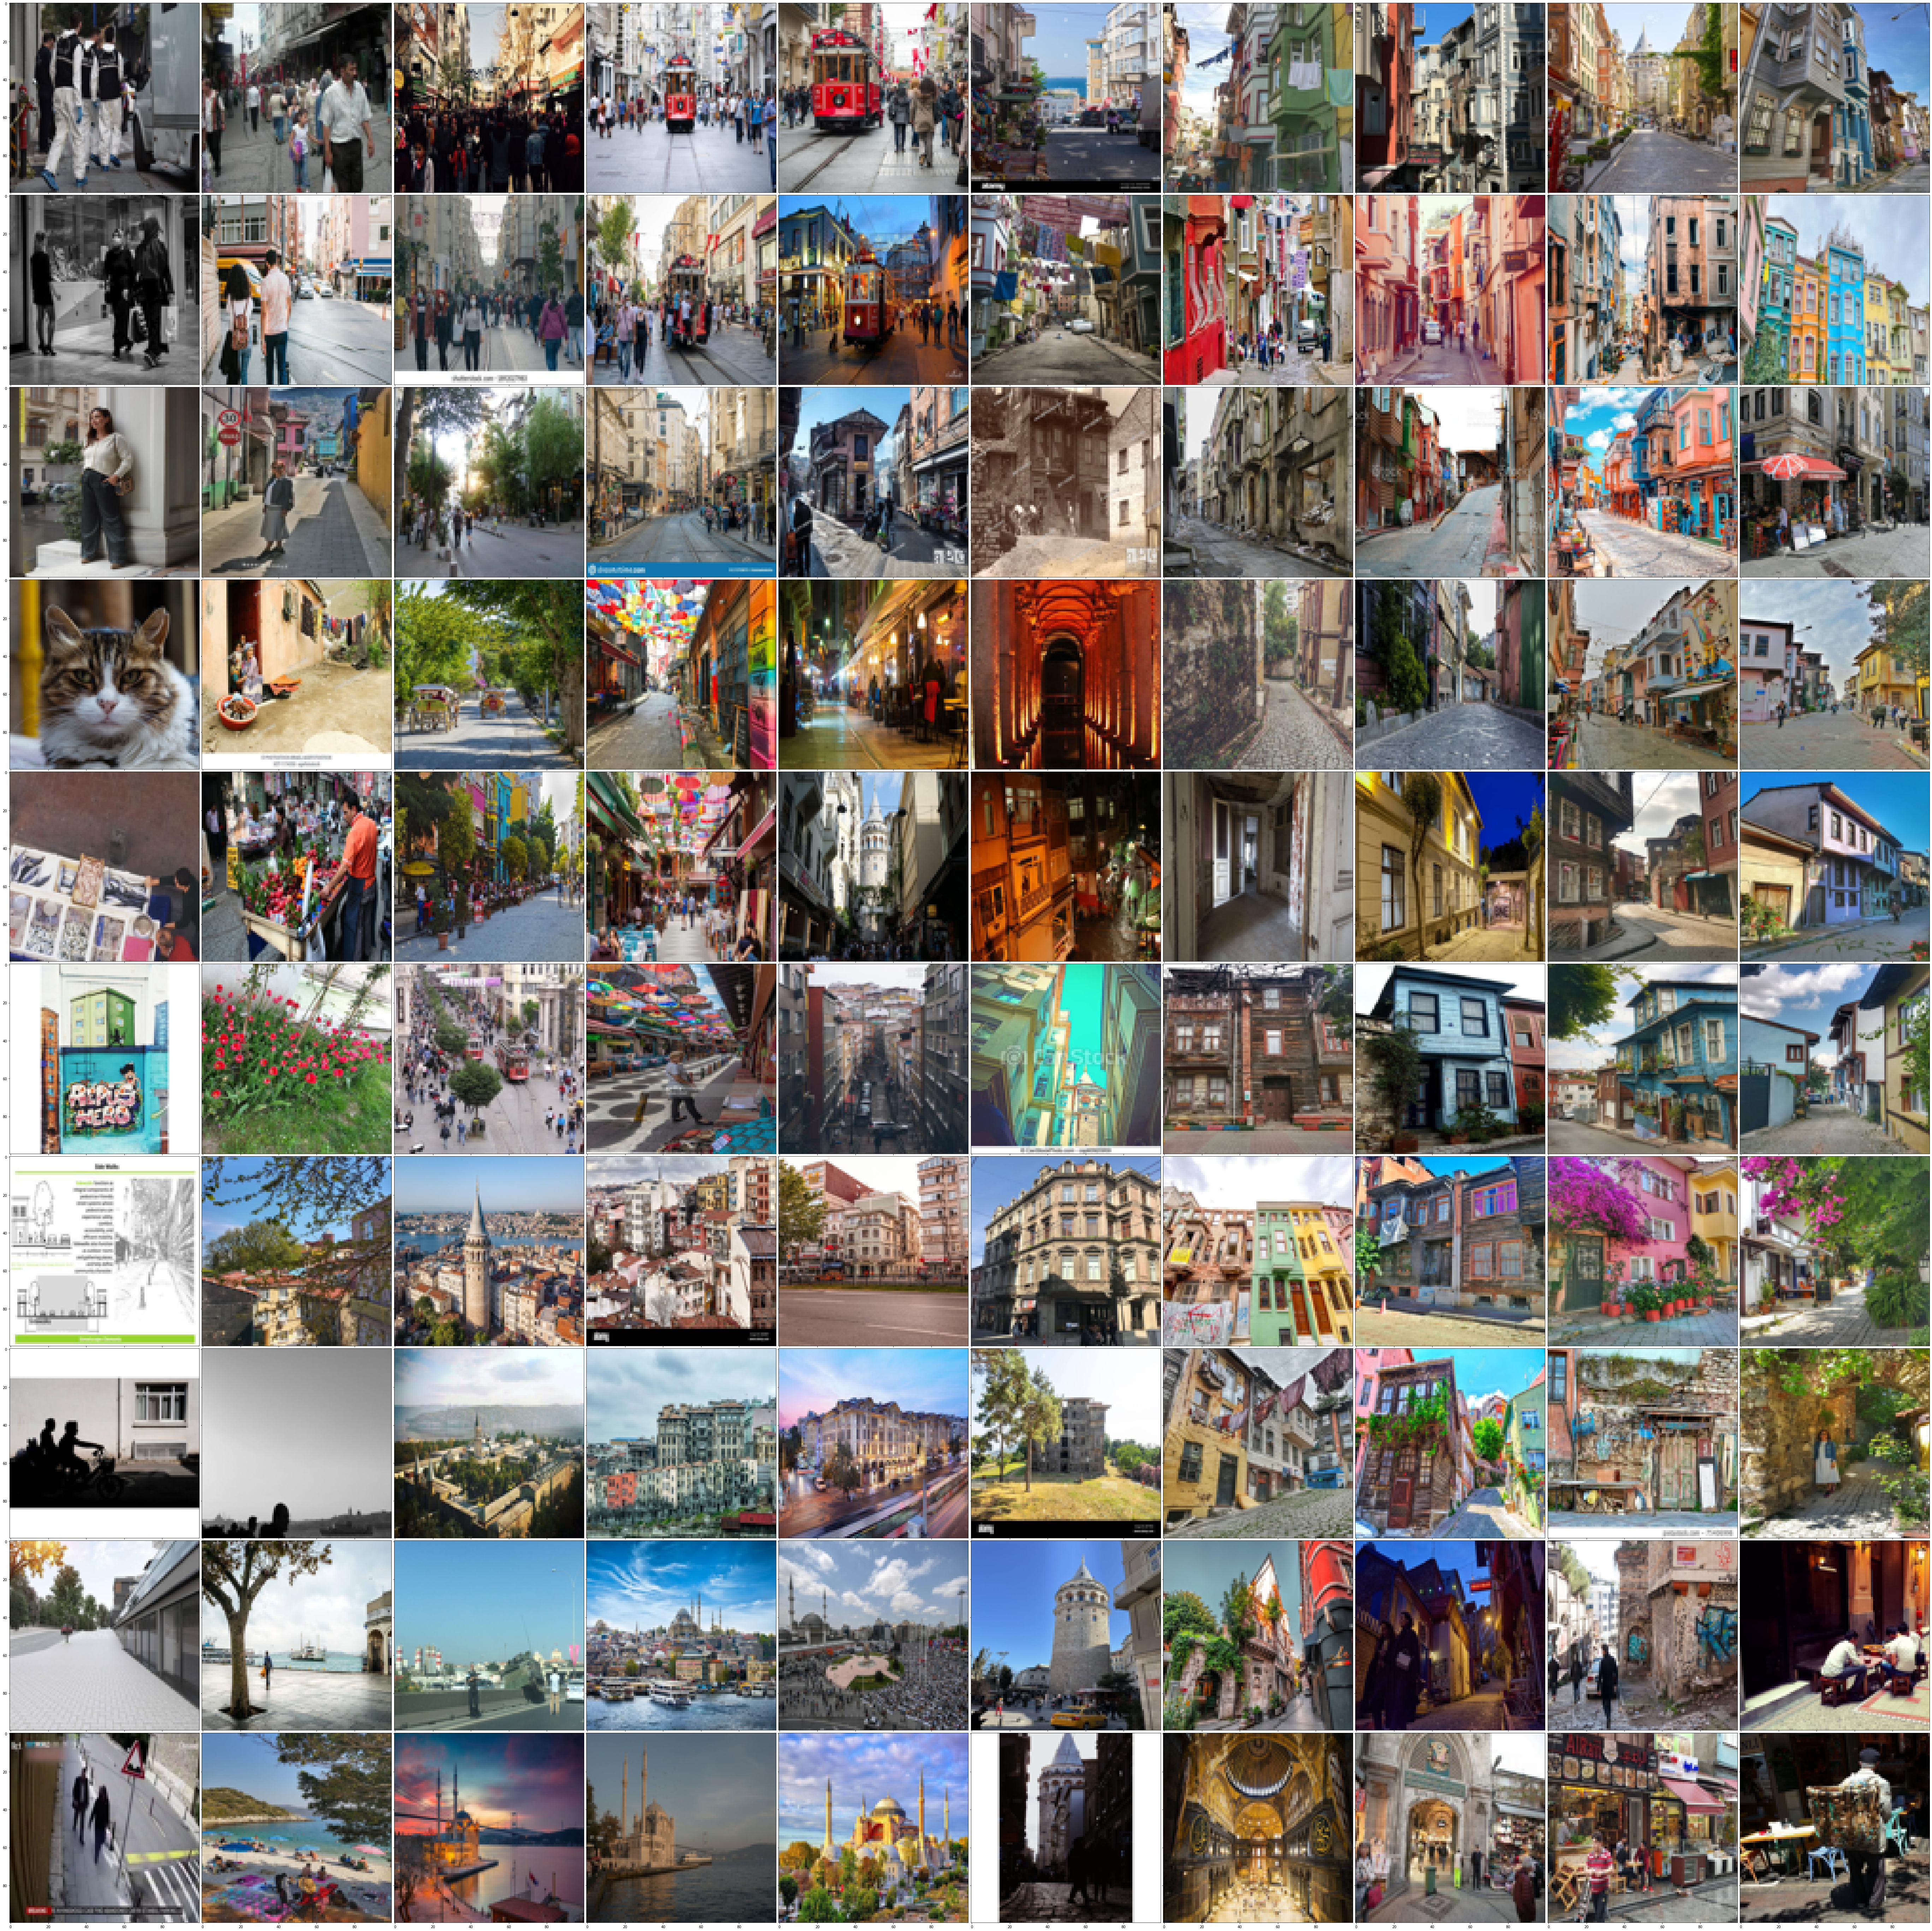

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

img_arr = []
for image in imageGrid:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(10, 10),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.show()

In [23]:
somName = 'SOM'
os.mkdir(somName)
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        folder = str(g)+'_'+str(h)
        os.mkdir(somName+'/'+folder)

In [24]:
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        folder = str(g)+'_'+str(h)
        for i in cell:
            shutil.copy('images/'+i['image'], somName+'/'+folder)